In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # 28x28 images of hand-written digits (0-9)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

11490434/11490434 [==============================] - 1s 0us/step


In [16]:
# creating a callback for early stopping
# This callback will stop the training when there's not been any improvement in loss for 3 consecutive epochs
# from gc import callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.1, callbacks=[callback], epochs=100)
print(len(history.history))

Epoch 1/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2778 - accuracy: 0.9190 - val_loss: 0.1269 - val_accuracy: 0.9627
Epoch 2/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1131 - accuracy: 0.9650 - val_loss: 0.1074 - val_accuracy: 0.9660
Epoch 3/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0753 - accuracy: 0.9765 - val_loss: 0.0937 - val_accuracy: 0.9702
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0572 - accuracy: 0.9820 - val_loss: 0.0931 - val_accuracy: 0.9717
Epoch 5/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0805 - val_accuracy: 0.9795
Epoch 6/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0908 - val_accuracy: 0.9753
Epoch 7/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9903 - val_loss: 0.0920 - val_ac

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9720
0.08517927676439285 0.972000002861023


In [22]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 909us/step


7


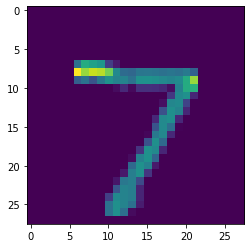

In [23]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])